In [62]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collection as c
from datetime import datetime, timedelta


In [63]:
#Comvert csv file to DataFrame object
df = pd.read_csv('denue_inegi_02_.csv', encoding='latin-1')

#Print df info
df.info()

#Print df head
df.head(3)

C:\Users\rtexi\AppData\Local\Temp\ipykernel_13964\3090676172.py:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('denue_inegi_02_.csv', encoding='latin-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126088 entries, 0 to 126087
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          126088 non-null  int64  
 1   clee        126088 non-null  object 
 2   nom_estab   126088 non-null  object 
 3   raz_social  36458 non-null   object 
 4   codigo_act  126088 non-null  int64  
 5   nombre_act  126088 non-null  object 
 6   per_ocu     126088 non-null  object 
 7   tipo_vial   125449 non-null  object 
 8   nom_vial    126087 non-null  object 
 9   tipo_v_e_1  122662 non-null  object 
 10  nom_v_e_1   123022 non-null  object 
 11  tipo_v_e_2  122663 non-null  object 
 12  nom_v_e_2   123015 non-null  object 
 13  tipo_v_e_3  122703 non-null  object 
 14  nom_v_e_3   122984 non-null  object 
 15  numero_ext  93710 non-null   float64
 16  letra_ext   49435 non-null   object 
 17  edificio    14128 non-null   object 
 18  edificio_e  14670 non-null   object 
 19  nu

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,8320509,02002115111000041000000000S5,ABOS ABS PROMOTORA DE MEXICO SADE CV,NaN,115111,Servicios de fumigación agrícola,0 a 5 personas,CALLE,NINGUNO,CALLE,...,Ejido Hermosillo,8423,3,667603750,NaN,NaN,Fijo,32.523387,-114.917778,2019-11
1,8838283,02001112512000434000000000U6,ABULONES CULTIVADOS,ABULONES CULTIVADOS S DE RL DE CV,112512,"Piscicultura y otra acuicultura, excepto camar...",11 a 30 personas,CALLE,Lázaro Cárdenas,CALLE,...,Ensenada,0717,16,NaN,MANAGER@ABULONES.COM,WWW.ABULONES.COM,Fijo,31.862157,-116.626707,2019-11
2,6166342,02001112512000205010000000U0,ACUACULTURA DE BAJA CALIFORNIA SA DE CV,ACUACULTURA DE BAJA CALIFORNIA,112512,"Piscicultura y otra acuicultura, excepto camar...",51 a 100 personas,NaN,PRIMERA,NaN,...,El Sauzal de Rodríguez,0308,10,NaN,MONTERRUBIOJESUS@PRODIGY.NET.MX,NaN,Fijo,31.895264,-116.697901,2010-07


### Let's talk about Tijuana...

Once we have seen a brief overview of the data provided, lets see what more we can extract from it, our main focus will be Tijuana.

Here, we would try to ask the following questions:

1. **What is the zone that has more employability in TJ?**
2. **What is the most representative industry in TJ?**
3. **What kind of businesses have survived more than 10 years?**
4. **What are the top 3 businees area, in terms of seniority and size (How many people is working in the business)**



**1. What is the zone that has more employability in TJ? (Done)**

First, we will start by defining our subset TJ.

In [64]:
#Filter dataset
tj = df[df['municipio'] == 'Tijuana'].copy()

#Print tj info
tj.info()

#Print first observation of tj Dataframe
tj.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60145 entries, 52 to 126081
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          60145 non-null  int64  
 1   clee        60145 non-null  object 
 2   nom_estab   60145 non-null  object 
 3   raz_social  18187 non-null  object 
 4   codigo_act  60145 non-null  int64  
 5   nombre_act  60145 non-null  object 
 6   per_ocu     60145 non-null  object 
 7   tipo_vial   59743 non-null  object 
 8   nom_vial    60145 non-null  object 
 9   tipo_v_e_1  58277 non-null  object 
 10  nom_v_e_1   58546 non-null  object 
 11  tipo_v_e_2  58275 non-null  object 
 12  nom_v_e_2   58540 non-null  object 
 13  tipo_v_e_3  58306 non-null  object 
 14  nom_v_e_3   58529 non-null  object 
 15  numero_ext  49148 non-null  float64
 16  letra_ext   18664 non-null  object 
 17  edificio    9467 non-null   object 
 18  edificio_e  9679 non-null   object 
 19  numero_int  23765 non-n

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
52,9035194,02004115111000081000000000U7,CUSTOMER SOLUTION CO,CUSTOMER SOLUTION CO S DE RL DE CV,115111,Servicios de fumigación agrícola,0 a 5 personas,CALLE,SEXTA Y/O FLORES MAGON,AVENIDA,...,Tijuana,0206,3,6645621087,NaN,NaN,Fijo,32.530008,-117.04566,2019-11


We can see that we have various types of variables, from which many are unnecesary in our analysis, lets start by dropping them!

In [65]:
#Drop unnecesary columns (latitude, coordinates, etc...)
tj.drop(columns=c.columns_to_drop, inplace=True)

#Print tj DataFrame
tj.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60145 entries, 52 to 126081
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nom_estab   60145 non-null  object 
 1   raz_social  18187 non-null  object 
 2   codigo_act  60145 non-null  int64  
 3   nombre_act  60145 non-null  object 
 4   per_ocu     60145 non-null  object 
 5   numero_ext  49148 non-null  float64
 6   letra_ext   18664 non-null  object 
 7   tipo_asent  59838 non-null  object 
 8   nomb_asent  60079 non-null  object 
 9   cod_postal  59291 non-null  float64
 10  entidad     60145 non-null  object 
 11  localidad   60145 non-null  object 
 12  manzana     60145 non-null  int64  
 13  telefono    21189 non-null  object 
 14  correoelec  14305 non-null  object 
 15  www         5407 non-null   object 
 16  fecha_alta  60145 non-null  object 
dtypes: float64(2), int64(2), object(13)
memory usage: 8.3+ MB


As not exist an explicit column for assess the employability in TJ, we will use what we have at hand.

First, we can see that we have some interesting columns:
1. per_ocu (giving mention to 'personal ocupado', which tells us how many people are working in the company)
2. localidad (zones where the business are located in)

given that we cannot perform a direct relation operation because neither 'per_ocu' nor 'localidad' are numeric (both are categorical), we must have to transform at least one variable to make it a numerical type

so for this, we have to re-scale the 'per_ocu' variable, starting with the companies with '0 to 5' employees with value 1 (minimum possible) to companies with '251+' employees with value 251 (minimum possible). Fortunately, we've already created a dictionary that contains the key-values for this variable, this dictionary is available in collection.py. Let's work!

In [66]:
#Create a column called 'minimum_employees' with lambda filtration
tj['minimum_employees'] = tj['per_ocu'].apply(lambda x: c.cat_to_num_perocu.get(x))

#Print all unique values in 'minimum_employees'
tj['minimum_employees'].unique()

array([  1,   6,  11,  31,  51, 251, 101], dtype=int64)

Once we have done that, we can group by 'localidad' and filter only the top 5 zones with minimum employees.

In [67]:
#Grouping by manzana
zone_minemployee = tj.groupby('localidad')['minimum_employees'].sum().reset_index()

#Sort minimum employees values
zone_minemployee = zone_minemployee.sort_values(by='minimum_employees', ascending=False)

#Select top5zones_1
top5zones_1 = zone_minemployee.head(5)

#Print top5zones_1
top5zones_1

,localidad,minimum_employees
57,Tijuana,342800
61,Villa del Campo,749
56,Thomas Alva Edison [Parque Industrial],720
9,El Niño,549
3,Cuesta Blanca,272


It seems like Tijuana is the zone added by default, given that we want to create a barplot, it would be better to drop that column, let's do it

In [68]:
#Create top10zones_1 DataFrame subseting all zones != 'Tijuana' in zone_minemployee
top5zones_1 = zone_minemployee.loc[zone_minemployee['localidad'] != 'Tijuana'].head(5)

#Print top10zones_1 DataFrame
top5zones_1

,localidad,minimum_employees
61,Villa del Campo,749
56,Thomas Alva Edison [Parque Industrial],720
9,El Niño,549
3,Cuesta Blanca,272
58,Toyota [Motor Manufacturing de Baja California],270


Now, lets plot the top 10 zones with minimum employees, or, in other words, the 5 zones with more chances to find more employees

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Villa del Campo'),
  Text(1, 0, 'Thomas Alva Edison [PI]'),
  Text(2, 0, 'El Niño'),
  Text(3, 0, 'Cuesta Blanca'),
  Text(4, 0, 'Toyota')])

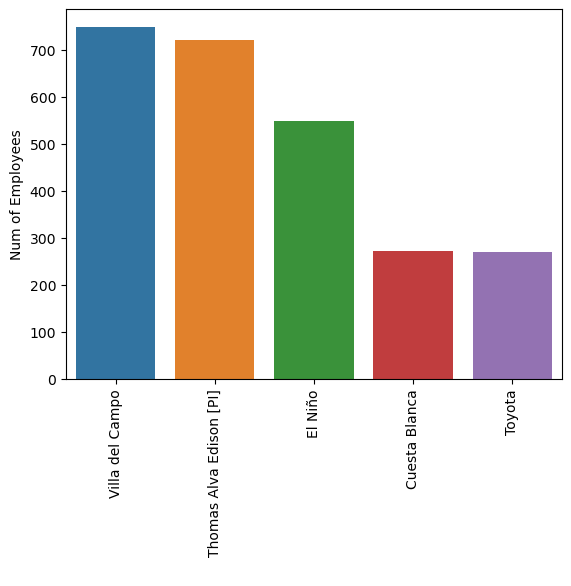

In [69]:
#Definine barplot
ax = sns.barplot(data = top5zones_1, x = 'localidad', y = 'minimum_employees')

# Define custom labels for the x-axis
custom_x_labels = ['Villa del Campo', 'Thomas Alva Edison [PI]', 'El Niño', 'Cuesta Blanca', 'Toyota']

# Set custom labels for the x-axis
ax.set_xticklabels(custom_x_labels)

# Custom labels
ax.set_ylabel('Num of Employees')
ax.set_xlabel(' ')

#rotate labels
plt.xticks(rotation=90)


The previous visualization reveals that the **top 5 zones** with the **highest number of minimum employees** in the locality of Tijuana are:

1. **Villa Del Campo**
2. **Thomas Alva Edison** (Industrial Zone)
3. **El Niño**
4. **Casa Blanca**
5. **Toyota** (Manufacture Company - Industrial Zone)

**We must be cautious about the information provided earlier, as this information was collected in the 2022. Also, recall that lot of observations were filtered, leaving out those observations with 'Tijuana' as locality.**

2. **What is the most representative industry in TJ?**

To adress this question, we must perform an analysis in those columns that gives us information about the industry that each business belongs to, if we take a brief look at the 'tj' dataframe we can see that we have some interesting columns that mey serves us to get good conclusions about the raised question. This columns are:

1. nombre_act
2. nom_estab
3. minimum_employees



First, lets take a look at the 'nombre_act' column, in this way we can see the state of the data

In [70]:
#Print the 'nombre_act' dataframe
tj['nombre_act'].head(12)

52                      Servicios de fumigación agrícola
60                      Beneficio de productos agrícolas
61                      Beneficio de productos agrícolas
77                      Servicios de fumigación agrícola
79     Pesca y captura de peces, crustáceos, moluscos...
83                      Beneficio de productos agrícolas
84       Otros servicios relacionados con la agricultura
92     Piscicultura y otra acuicultura, excepto camar...
228    Pesca y captura de peces, crustáceos, moluscos...
291                     Beneficio de productos agrícolas
316                     Servicios de fumigación agrícola
326                     Servicios de fumigación agrícola
Name: nombre_act, dtype: object

As we can see, the 'nombre_act' column has a description of the business, more specifically the sector to which the business fits in.

this could be useful if we wanted to perform a deep analysis on each seactor, but, as we dont want to, we will only select the most representative word, that is, the first word of each observation and then save that element in a variable called 'sector' (tj['sector]). 
Lets do it!.

In [71]:
#Filter 'nombre_act' column by spliting each string and selecting the first element (word)
tj['sector'] = tj['nombre_act'].apply(lambda x: x.split()[0])

#Print the first 21 rows
tj['sector'].head(10)

52        Servicios
60        Beneficio
61        Beneficio
77        Servicios
79            Pesca
83        Beneficio
84            Otros
92     Piscicultura
228           Pesca
291       Beneficio
Name: sector, dtype: object

Great, it seems that we've already filtered the first element and saved it in 'sector' column. Now, lets select the 5 most representative businesses sectors in Tijuana.

In [72]:
#select the sum of the minimum employees in each business and group by sector
industry_employees = tj.groupby('sector')['minimum_employees'].sum().reset_index()

#Sort values in ascending, save the first 5 observations
top5_2 = industry_employees.sort_values(by='minimum_employees', ascending=False).head(5)

#Print the top5_2 df
top5_2

,sector,minimum_employees
60,Fabricación,77717
38,Comercio,72156
57,Escuelas,24245
123,Servicios,21525
119,Restaurantes,18255


This looks fantastic, but, we will improve it performing a visualization of the insight!

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Fabricación'),
  Text(1, 0, 'Comercio'),
  Text(2, 0, 'Escuelas'),
  Text(3, 0, 'Servicios'),
  Text(4, 0, 'Restaurantes')])

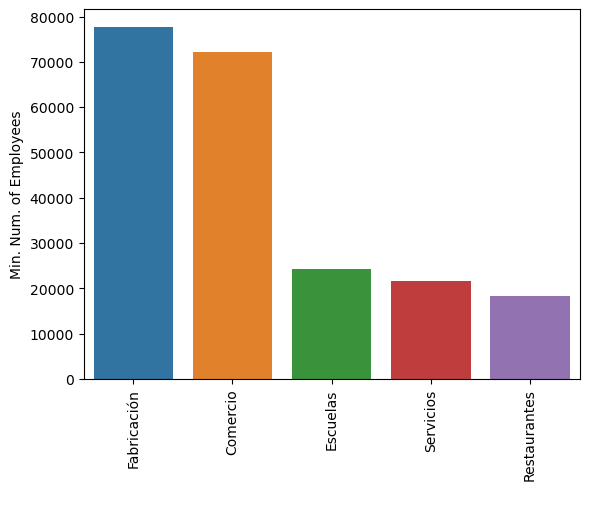

In [73]:
#Definine barplot
ax = sns.barplot(data = top5_2, x = 'sector', y = 'minimum_employees')

# Custom labels
ax.set_ylabel('Min. Num. of Employees')
ax.set_xlabel(' ')

#rotate labels
plt.xticks(rotation=90)

3. **What type of businesses that have survived more than 10 years?**

To solve this question we will have to make use of two vaiables:

1. fecha_alta
2. tj_sector (variable assigned previously by us)

First, we have to create a subset of tj by filtering those business with 10 years older or more, in order to do that, we must first have to check if the fecha_alta variable is a date time column.

In [74]:
#Display fecha_alta type
print(tj['fecha_alta'].info())

<class 'pandas.core.series.Series'>
Int64Index: 60145 entries, 52 to 126081
Series name: fecha_alta
Non-Null Count  Dtype 
--------------  ----- 
60145 non-null  object
dtypes: object(1)
memory usage: 939.8+ KB
None


We can see that this column is not a datetime data type. Let's convert it to datetime data type!.

In [75]:
#Convert 'fecha_alta' data type to date_time object
tj['fecha_alta'] = pd.to_datetime(tj['fecha_alta'])

#Check if the operation has been done correctly
tj['fecha_alta']

52       2019-11-01
60       2019-11-01
61       2014-12-01
77       2019-11-01
79       2019-11-01
            ...    
126061   2010-07-01
126069   2014-12-01
126075   2019-11-01
126079   2019-11-01
126081   2014-12-01
Name: fecha_alta, Length: 60145, dtype: datetime64[ns]

Perfect, it seems that now is possible to perform a subset with all business with 10 years or more older. 

In [82]:
#Create a subset 'older business' dataframe by filtering all the business that are 10 years old or older
older_business = tj.loc[tj['fecha_alta'] <= '2012-01-01']

#Preview subset
older_business

,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,numero_ext,letra_ext,tipo_asent,nomb_asent,cod_postal,entidad,localidad,manzana,telefono,correoelec,www,fecha_alta,minimum_employees,sector
84,HOJAS PARA TAMALES,HOJAS PARA TAMALES S DE RL DE CV,115119,Otros servicios relacionados con la agricultura,11 a 30 personas,210.0,NaN,COLONIA,CHULA VISTA,22045.0,Baja California,Tijuana,58,6642044609,EDPREG@YAHOO.COM,NaN,2010-07-01,11,Otros
92,JAGUEY SANTA MARGARITA,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,NaN,DOMICILIO CONOCIDO,COTO,SANTA MARGARITA,22024.0,Baja California,Tijuana,97,2412201324,NaN,NaN,2010-07-01,1,Piscicultura
415,PETREMEX SA DE CV,PETREMEX SA DE CV,212321,Minería de arena y grava para la construcción,31 a 50 personas,21837.0,NaN,COLONIA,EL REALITO DELEGACION LA PRESA,22250.0,Baja California,Tijuana,8,NaN,PETREMEX@PRODIGY.NET.MX,NaN,2010-07-01,31,Minería
453,CESPT,COMISION ESTATAL DE SERVICIOS PÚBLICOS DE TIJU...,221312,"Captación, tratamiento y suministro de agua re...",11 a 30 personas,NaN,SN,COLONIA,RANCHO RIVERA,22114.0,Baja California,Tijuana,64,NaN,NaN,NaN,2010-07-01,11,"Captación,"
489,COMISION FEDERAL DE ELECTRICIDAD,COMISION FEDERAL DE ELECTRICIDAD,221111,Generación de electricidad a partir de combust...,0 a 5 personas,1889.0,NaN,COLONIA,ZONA URBANA RIO TIJUANA,22320.0,Baja California,Tijuana,6,6646242926,NaN,WWW.CFE.ORG.MX,2010-07-01,1,Generación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126021,TESORERIA MUNICIPAL,CAJA,931210,Administración pública en general,0 a 5 personas,0.0,SN,SECCION,PLAYAS DE TIJUANA SECC JARDINES DEL SOL,22200.0,Baja California,Tijuana,19,NaN,NaN,NaN,2010-07-01,1,Administración
126023,TESORERIA MUNICIPAL OFICINA DE REZAGOS MUNICIP...,GOBIERNO MUNICIPAL,931210,Administración pública en general,11 a 30 personas,0.0,SN,COLONIA,20 DE NOVIEMBRE,22100.0,Baja California,Tijuana,28,NaN,MNMIRANDA@TIJUANA.GOB.MX,AYUNTAMIENTODETIJUANA.GOB.MX,2010-07-01,11,Administración
126037,TRIBUNAL UNITARIO CONTENCIOSO ADMINISTRATIVO M...,AYUNTAMIENTO DE TJUANA,931410,Impartición de justicia y mantenimiento de la ...,6 a 10 personas,1350.0,NaN,COLONIA,ZONA URBANA RIO TIJUANA,22010.0,Baja California,Tijuana,28,NaN,JAPENA@TIJUANA.GOB.MX,WWW.TIJUANA.GOB.MX,2010-07-01,6,Impartición
126060,UNIDAD DE PROTECCION CIVIL TIJUANA,AYUNTAMIENTO,931410,Impartición de justicia y mantenimiento de la ...,0 a 5 personas,NaN,SN,COLONIA,DEL RIO REFORMA,22454.0,Baja California,Tijuana,40,NaN,PROTECCIONCIVIL@TIJUANA.GOB.MX,NaN,2010-07-01,1,Impartición


Now, once we have performed the filtering, we can group by sector and count how many business are living since 10 years ago, then, assgin the top 5 more reliables sectors in a variable called top5_3


In [99]:
#Group by sector and count all the business for each one
top5_3 = tj['sector'].value_counts().head(5)

top5_3 = pd.DataFrame(top5_3).reset_index()

top5_3.columns = ['sector', 'count']

#Display top5_3
display(top5_3)

,sector,count
0,Comercio,22236
1,Restaurantes,4325
2,Salones,3444
3,Servicios,3170
4,Reparación,3146


Great, we found what are the top 5 sectors that have survived along 10 years since 2012, lets visualize our findings and give a resume about our insights.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Comercio'),
  Text(1, 0, 'Restaurantes'),
  Text(2, 0, 'Salones'),
  Text(3, 0, 'Servicios'),
  Text(4, 0, 'Reparación')])

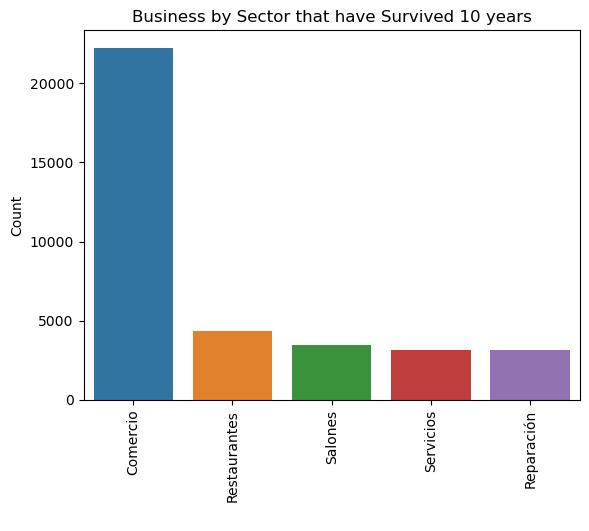

In [101]:
#Definine barplot
ax = sns.barplot(data = top5_3, x='sector', y='count')

#Custom title
ax.set_title('Business by Sector that have Survived 10 years')

# Custom labels
ax.set_ylabel('Count')
ax.set_xlabel(' ')

#rotate labels
plt.xticks(rotation=90)